# Machine Learning on Texas Oil & Gas Industry Water Spills from 2013 to 2022
This project will focus on data pertaining to oil spills occurring from 2013 to 2022 in Texas. The article linked entails the millions of gallons of wastewater spilled by oil and gas companies. [Oil and Gas Companies Spill Millions of Gallons of Wastewater in Texas](https://insideclimatenews.org/news/31102023/oil-gas-companies-spill-wastewater-in-texas/) The data was retrieved from the Texas Railroad commission which the article states has a history of "messy record-keeping" which was then cleaned for a "first-ever public analysis of produced water spills" (Aldhous & Pskowski). It not only tracks crude oil spillage, but also toxic wastewater as a byproduct of these companies that is "highly saline" and harmful to farming land nearby as it "can render land barren for years" (Aldhous & Pskowski).

I retrieved my data files from [kaggle](https://www.kaggle.com/datasets/sujaykapadnis/texas-oil-and-gas-industry-water-spills-2013-2022/data) which contained two csv files of "cleaned" data regarding these oil spills. Cleaned is in quotes as it is cleaned for the uploader's purposes (volume of water and oil in barrels is converted to gallons, and instances of recovered oil and water are remedied so they are not larger than instances of oil and water released), but I intend to further clean it for my purposes. The file I am working with is called "central_cleaned.csv", and I aim to perform regression on this data to capture the importance of what is provided. 

First, I will identify the data items that are most important to this topic. I will then clean the data even further to work with a dataframe that is relevant to my goal. My identified main features are **release_crude_oil, release_prod_wtr, recovery_crude_oil, and recovery_prod_wtr**. The feature **release_crude_oil** is related to gallons of crude oil released, and **release_prod_wtr** is related to gallons of wastewater released. On the other hand, **recovery_crude_oil, and recovery_prod_wtr** are gallons of crude oil and wastewater recovered. I aim to see how these features are correlated and will then do as follows:

## 1. Perform Linear Regression
From this I hope to see how strongly all of these features are correlated and gain general information about the relationships between the release of crude oil and the release of wastewater produced. I will be looking at the model's key values such as r-squared and p-values to hopefully get a better understanding on how strong my selected features are and training my models on this data. 
## 2. Perform Random Forest Regression
I will then perform regression on this data to see if a non-linear approach is a better fit. I will again, compare significant key values such as r-squared to see if there were any improvements on fitting our data. 

My goal is to _highlight the importance of understanding and predicting the release of crude oil over poorly maintained data_. As this world moves towards fighting issues such as climate change, it is crucial to make sense of the information we can get about how companies are operating.  

In [17]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
sns.set()

## Data:

**Sources**

[Oil and Gas Companies Spill Millions of Gallons of Wastewater in Texas](https://insideclimatenews.org/news/31102023/oil-gas-companies-spill-wastewater-in-texas/)

[kaggle](https://www.kaggle.com/datasets/sujaykapadnis/texas-oil-and-gas-industry-water-spills-2013-2022/data)

Here we load our data using pandas. At the call of df.head() (our dataframe) you can get an idea of what our uncleaned data looks like. It features 5 rows and 56 columns of which we will be dropping many. 

In [3]:
df = pd.read_csv('data/central_cleaned.csv')

In [4]:
df.head()

,dist,district_edit,date_called_in,date_called_in_edit,date_of_spill,date_of_spill_edit,spill_number,rrc_job_number,operator_rp,operator_edit,...,cleanup_oversight_austin,status,comments,compliance_date,file,sheet,cleanup_criteria,cleanup_oversight,rrc_job_number_2,my_of_spill
0,04,4,2013-01-13,2013-01-13,2013-01-13,2013-01-13,04-1238,2013-381,Headington Oil Company,HEADINGTON OIL,...,NaN,assessment phase,Leak in gathering line DS,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
1,06,6,2013-01-06,2013-01-06,2013-01-05,2013-01-05,1291,2013-06-195,"Quantum Resources Management, LLC",QUANTUM RESOURCES,...,41284,JH,NaN,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
2,7C,7C,2013-01-22,2013-01-22,2013-01-22,2013-01-22,1829,324,EOG Resources,EOG Resources,...,No,assessment phase,Dump valve misfired,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
3,7C,7C,2013-01-14,2013-01-14,2013-01-13,2013-01-13,1830,191,Pioneer Natural Res. USA Inc.,Pioneer Natural Resources (acq. by ExxonMobil ...,...,No,cleanup phase,"water leg plugged up water went in oil tank, r...",NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
4,7C,7C,2013-01-14,2013-01-14,2013-01-05,2013-01-05,1832,192,"Molopo Energy Texas, LLC","MOLOPO ENERGY TEXAS, LLC",...,No,cleanup phase,heater treater was not started ran prod tank over,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01


### Data Cleaning:

_**Explanations...**_

After looking at our data initially, it's clear to see we have a lot of information that will not be helpful to us. I do not really care about dates, or district counties as the information we are looking for pertains to quantity of crude oil and wastewater being released.

Here you will see us identifying the columns we want to keep:
**probable_cause, release_crude_oil, release_prod_wtr, recovery_crude_oil,   and recovery_prod_wtr**

We then take the difference of the columns we want to keep and drop those. We also clean the dataframe of any NaN values in order to avoid issues in the future. 

I also had to identify columns with numerical information and convert them to having number values as initially, everything was of the datatype object. I created a seperate reference to the numerical data for future use.

In [5]:
columns_keep = ['probable_cause','release_crude_oil','release_prod_wtr','recovery_crude_oil','recovery_prod_wtr']
numerics = ['release_crude_oil','release_prod_wtr','recovery_crude_oil','recovery_prod_wtr']
df[numerics] = df[numerics].apply(pd.to_numeric, errors='coerce')
df.drop(columns=df.columns.difference(columns_keep), inplace=True)
df.dropna(inplace=True)

_**Conclusion + Discussion, Visualization...**_

Here's a look at what we have after cleaning. We are left with 5 columns of relevance to our problem. We've turned our improper object datatypes into floating points and cleaned it of the many NaN values within. 

Technically this data was supposed to be already cleaned (you can read more about it in the intro), but this is the result of further cleaning for my own use!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8325 entries, 2 to 10323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   probable_cause      8325 non-null   object 
 1   release_crude_oil   8325 non-null   float64
 2   release_prod_wtr    8325 non-null   float64
 3   recovery_crude_oil  8325 non-null   float64
 4   recovery_prod_wtr   8325 non-null   float64
dtypes: float64(4), object(1)
memory usage: 390.2+ KB


## Exploratory Data Analysis:

I now dive further into my data. First I listed out the count of each probable cause occurrence. I never end up using this because I do not address classification in this project, but thought it was interesting nevertheless.

_**Visualizations...**_

Below you will find a correlation matrix of the numerical data in this dataframe. You will also see a pairplot of the relationships of these features. 

Cause count: mechanical failure      2380
internal corrosion      1325
Mechanical Failure       972
weather                  547
operator-human error     527
                        ... 
Knockout                   1
Corroded Fire Tube         1
Pinhole Leak               1
Driver Error               1
Leak in Line               1
Name: probable_cause, Length: 241, dtype: int64


<AxesSubplot: >

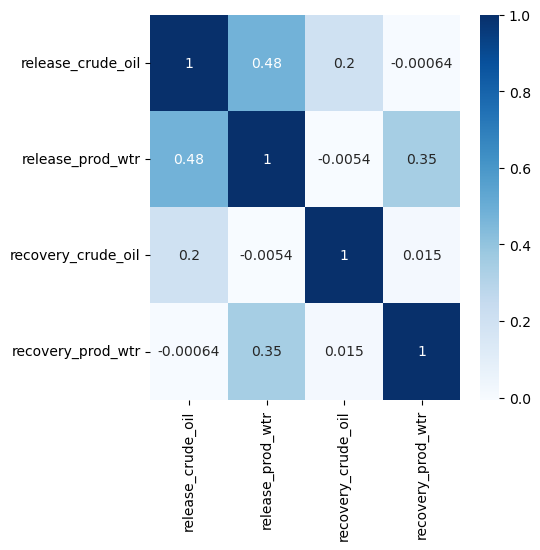

In [7]:
cause_counts = df['probable_cause'].value_counts()
print("Cause count:", cause_counts)


df.corr(numeric_only=True)
plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot = True)

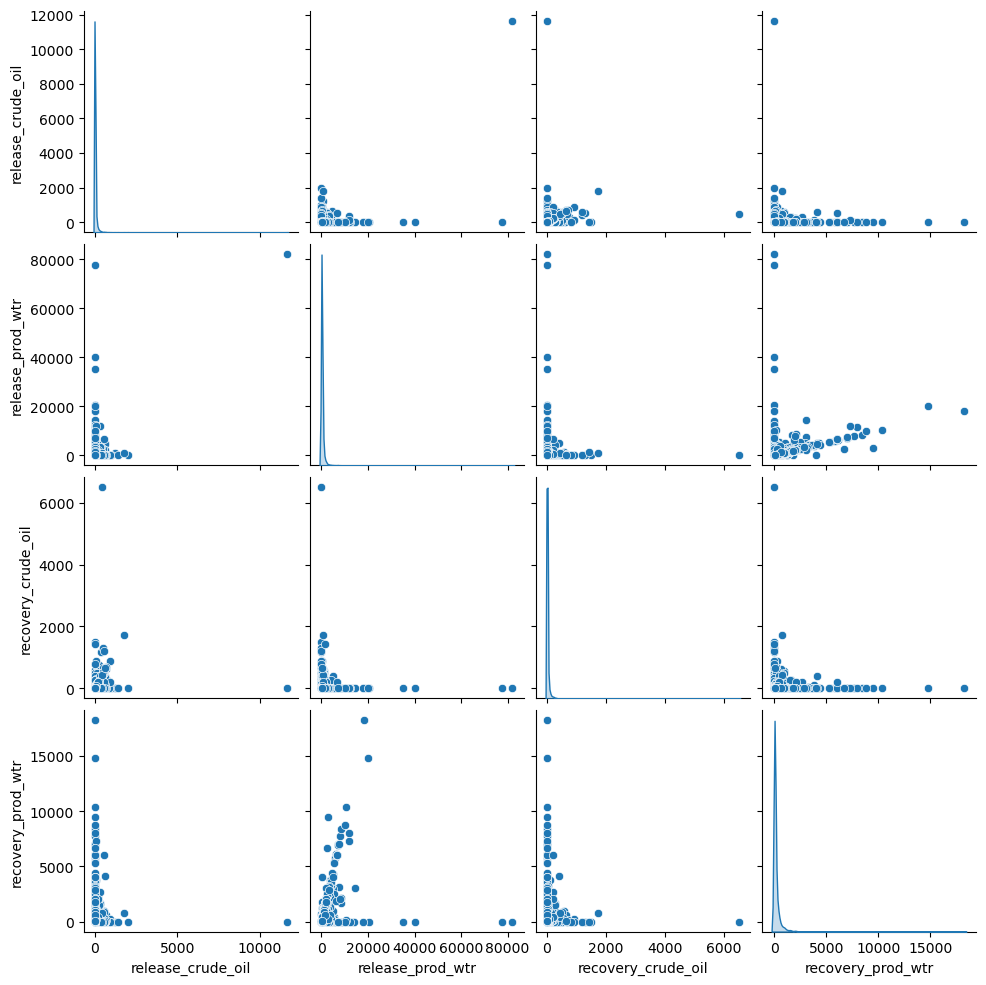

In [8]:
sns.pairplot(df, diag_kind="kde")

_**Discussions & Conclusions...**_

It is evident from my correlation matrix that **release_crude_oil** and **release_prod_wtr** revealing that there is a positive correlation between the two. These will be the main features I choose to explore. 

My pairplot also supports the findings form my correlation. Almost all of the scatterplots show positive correlations between the data I will be exploring. It is important to note that this data doesn't necessary look incredibly linear which will be explored in my other models. It also seems there may be some multicollinearity as all of them display this positive trend

## Models

Below I create two models: a linear regression model and a random forest regression model.

### Linear Regression Model:

First I go through all of my predictors and see which is a best matched against my target variable of released crude oil. 

_Feature Engineering:_

It seems as though released wastewater is the best predictor, but you'll notice that I chose to keep the other predictors to predict against crude oil released. This was a result of trial and error and seeing since all of them are related that they should all remain a part of the model. This also increased the r-squared of my model. 

This also means that this is a multilinear regression as I am using multiple features for my model. 

In [24]:
predictors = []
for column in df.columns[1:18]:
    pmodel = smf.ols(formula=f'release_crude_oil ~ {column}', data=df).fit()
    pR2 = pmodel.rsquared
    predictors.append((column, pR2))
    
predictors = sorted(predictors, key=lambda x: x[1], reverse=True)
print(predictors)

[('release_crude_oil', 1.0), ('release_prod_wtr', 0.22828375438769544), ('recovery_crude_oil', 0.03968507736828186), ('recovery_prod_wtr', 4.1033345621332984e-07)]


In [25]:
X = df.drop(columns=['probable_cause','release_crude_oil'], axis=1)
y = df['release_crude_oil']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

6660
1665


In [23]:
model = smf.ols(formula=f'release_crude_oil ~ release_prod_wtr + recovery_prod_wtr + recovery_crude_oil', data=df).fit()
R2 =  model.rsquared

print(model.summary())
print("R-squared:", R2)

                            OLS Regression Results                            
Dep. Variable:      release_crude_oil   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1199.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:19:17   Log-Likelihood:                -51872.
No. Observations:                8325   AIC:                         1.038e+05
Df Residuals:                    8321   BIC:                         1.038e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.5732      1

_**Discussions:**_

You'll see that my r-squared is 0.3012 meaning that my model is only accurately predicting 30% of variability of my data. This seemed a little low, so I plotted the Leverage vs. Normalized r-squared to see if there were unusual points. 

While there were unusual points which I made note of, I chose not to remove them as they were well documented. They were a result of a lightning strike, a mechanical failure, and an operator human error. This seemed like important information as their magnitude was justified by the cause. 

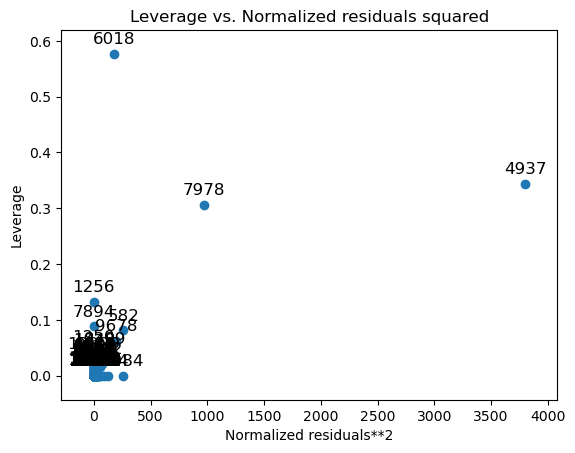

In [14]:
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [15]:
unusual = [6018, 7978, 4937]
observations = df.loc[unusual]
print(observations)

            probable_cause  release_crude_oil  release_prod_wtr  \
6018      LIGHTNING STRIKE              450.0               1.0   
7978    Mechanical Failure                0.0           77500.0   
4937  operator-human error            11630.0           82050.0   

      recovery_crude_oil  recovery_prod_wtr  
6018              6500.0                0.0  
7978                 0.0                0.0  
4937                 0.0                0.0  


### Plot of Linear Regression line 

Below you can see my plot of my linear regression on my target of released crude oil. As you can see the model is doing a decent job at fitting the data especially intially as there is more data concentrated there. We will explore better ways to fit later. 

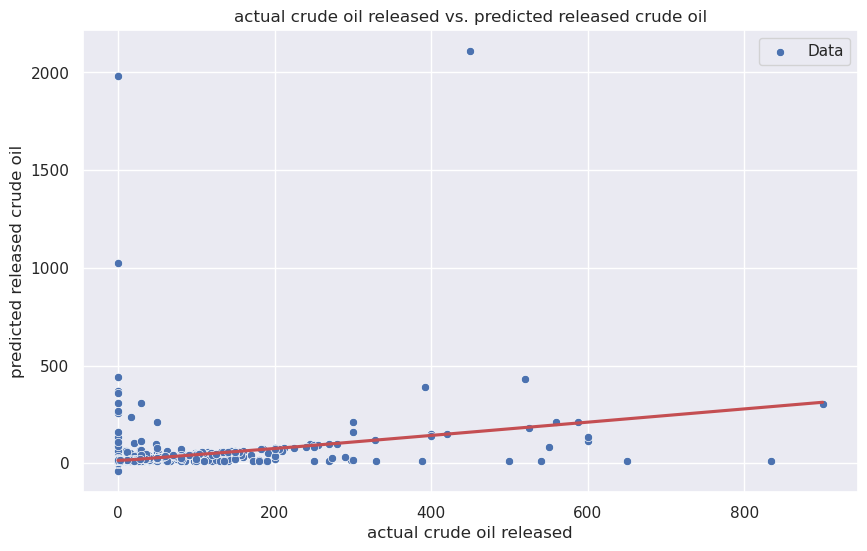

In [32]:
y_pred = model.predict(X_test)

results = pd.DataFrame({'release_crude_oil': y_test, 'predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_crude_oil', y='predicted', data=results, label='Data')
sns.regplot(x='release_crude_oil', y='predicted', data=results, scatter=False, lowess=True, color='r', line_kws={'label': 'Regression Line'})
plt.xlabel('actual crude oil released')
plt.ylabel('predicted released crude oil')
plt.title('actual crude oil released vs. predicted released crude oil')
plt.legend()
plt.show()

### Random Forest Regression Model

I moved on with making a regression model using random forests as I was suspiscious of the data not being perfectly linear. I believe this turned out to be somewhat correct as our r-squared improved almost 10%!

In [37]:
rFmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rFmodel.fit(X_train, y_train)
rFpred = rFmodel.predict(X_test)
r2 = r2_score(y_test, rFpred)
print("R-squared:", r2)

R-squared: 0.3871529063377276


### Plot of Random Forest Regression

You'll see below in the plot that our points are much better distributed, and our regression line now sits in between those higher crude oil values as opposed to our linear model where it sort of started to move away from fitting. 

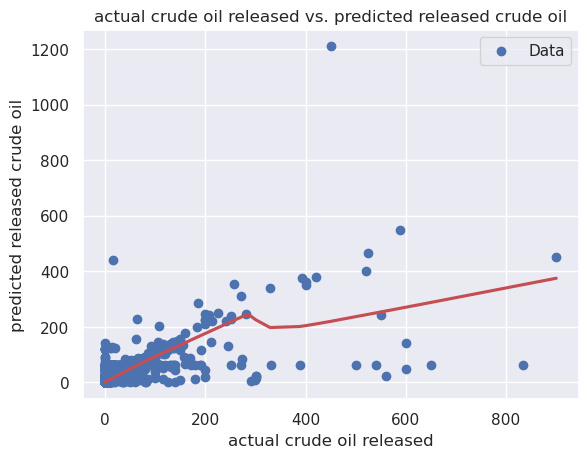

In [40]:
plt.scatter(y_test, rFpred, label='Data')
sns.regplot(x=y_test, y=rFpred, lowess=True, scatter=False, color='r', line_kws={'label': 'Random Forest Regression Line'})
plt.xlabel('actual crude oil released')
plt.ylabel('predicted released crude oil')
plt.title('actual crude oil released vs. predicted released crude oil')
plt.legend()
plt.show()

## Results and Analysis:

Below you'll see a comparison of our linear regression performed on our model in comparison to our random forest regression performed on our model.

Our results show that the model went from "doing a decent job at fitting the data especially intially" in a linear regression to improving the fit of the data going forward. Our random forest tree regression sits right in between our datapoints as opposed to above or below like in our linear regression model. 

I specifically chose this because a lot of data, especially when dealing with real life occurrances such as erosion and human error, is not linear. This allowed for more complex relationships to exist and potentially reduced over fitting. As more data points are introduced to this I am confident they will find a better fit with a random forest regression than a linear one. 

We were also able to achieve significant variables to run our regressions on. Our p-values remained small and our r-squared values increased almost 10%. This is exemplified by the graphs below.  

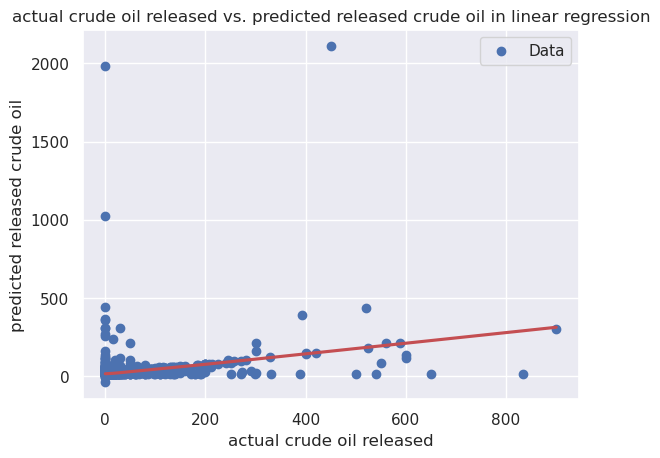

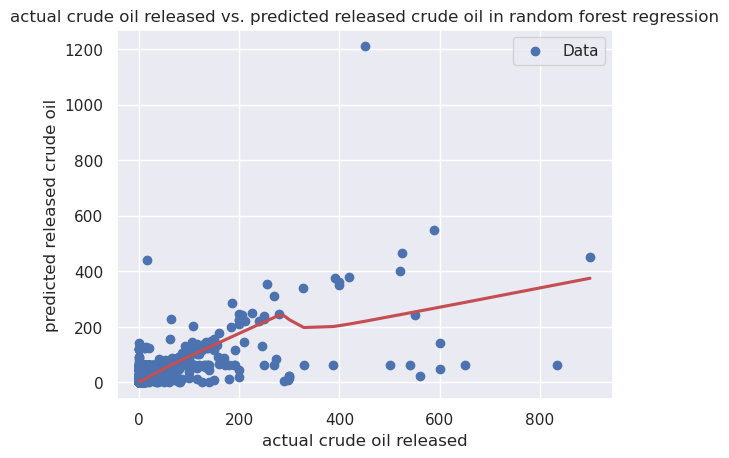

In [41]:
plt.scatter(y_test, y_pred, label='Data')
sns.regplot(x=y_test, y=y_pred, lowess=True, scatter=False, color='r', line_kws={'label': 'Linear Regression Line'})
plt.xlabel('actual crude oil released')
plt.ylabel('predicted released crude oil')
plt.title('actual crude oil released vs. predicted released crude oil in linear regression')
plt.legend()
plt.show()


plt.scatter(y_test, rFpred, label='Data')
sns.regplot(x=y_test, y=rFpred, lowess=True, scatter=False, color='r', line_kws={'label': 'Random Forest Regression Line'})
plt.xlabel('actual crude oil released')
plt.ylabel('predicted released crude oil')
plt.title('actual crude oil released vs. predicted released crude oil in random forest regression')
plt.legend()
plt.show()

## Discussion and Conclusion:

Overall we've shown that even with the "messy record-keeping" of the Texas Railroad commission we can still clean, and even further clean the data to produce the outcomes we are looking for. 

We were able to see what model training looks like on oil spill data, a highly important criteria for climate change. 

In addition, we were able to improve upon our models and develop better suited ones to see how released crude oil and wastewater and recovered crude oil and wastewater were related. 

Moreover, oil companies' crude oil spillage has an incredibly high correlation to wastewater being produced that is contaminating the lands around us which we depend on. 